#  Exploring risks factors for cardiovascular diseases

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### This dataset contains detailed information on the risk factors for cardiovascular disease. It includes information on age, gender, height, weight, blood pressure values, cholesterol levels, glucose levels, smoking habits and alcohol consumption of over 70 thousand individuals. A number of characteristics about the patient are included in each row

>● Age: Age of participant (integer)
>
>● Gender: Gender of participant (male/female)..
>
>● Height: Height measured in centimeters (integer)
>
>● Weight: Weight measured in kilograms (integer)
>
>● Ap_hi: Systolic blood pressure reading taken from patient (integer)
>
>● Ap_lo : Diastolic blood pressure reading taken from patient (integer)
>
>● Cholesterol : Total cholesterol level read as mg/dl on a scale 0 - 5+ units( integer). Each unit denoting increase/decrease by 20 mg/dL respectively. 
>
>● Gluc : Glucose level read as mmol/l on a scale 0 - 16+ units( integer). Each unit denoting increase Decreaseby 1 mmol/L respectively.
>
>● Smoke  : Whether person smokes or not(binary; 0= No , 1=Yes).
>
>● Alco ​­ : Whether person drinks alcohol or not(binary; 0 =No ,1 =Yes ).
>
>● Active : whether person physically active or not( Binary ;0 =No,1 = Yes ).
>
>● Cardio ­­ : whether person suffers from cardiovascular diseases or not(Binary ;0 – no , 1 ­‑yes ).
>
>● Data Source: If you use this dataset in your research, please credit the original authors. [Source](https://data.world/kudem/heart-disease-dataset).


 Identify any trends between the different values for each attribute and the development for cardiovascular disease among individuals represented by this dataset .
Age, gender, weight, lifestyle practices like smoking & drinking alcohol are all key influences when analyzing this problem set.



In [1]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='dark',)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('heart_data.csv')
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 14)

In [4]:
df.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [6]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## DATA CLEANING

In [9]:
df_copy = df.copy()

In [10]:
df_copy.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
#dropping unwanted column

df_copy.drop(columns=['index','id'], inplace=True)

In [12]:
# fixing the column names
df_copy.rename(columns={'gluc':'glucose','alco':'alcohol','ap_hi':'systolic_bp','ap_lo':'diastolic_bp'}, inplace=True)

In [13]:
df_copy.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
# Changing the age from days to years 

df_copy['age'] = df_copy['age']//365

In [15]:
df_copy['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

In [16]:
# Let's convert gender into female and male . Supposing 2 is for female and 1 for male.

df_copy['gender'] = df_copy['gender'].map({2:'female',1:'male'})

In [17]:
df_copy['gender']

0        female
1          male
2          male
3        female
4          male
          ...  
69995    female
69996      male
69997    female
69998      male
69999      male
Name: gender, Length: 70000, dtype: object

In [18]:
# change the data type of gender column, active, smoke, cardio, alco column to categorical data type

df_copy = df_copy.astype({"gender":'category',"active":'category',
                          "smoke": 'category', "cardio":'category', "alcohol": 'category'})
df_copy.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           70000 non-null  int64   
 1   gender        70000 non-null  category
 2   height        70000 non-null  int64   
 3   weight        70000 non-null  float64 
 4   systolic_bp   70000 non-null  int64   
 5   diastolic_bp  70000 non-null  int64   
 6   cholesterol   70000 non-null  int64   
 7   glucose       70000 non-null  int64   
 8   smoke         70000 non-null  category
 9   alcohol       70000 non-null  category
 10  active        70000 non-null  category
 11  cardio        70000 non-null  category
dtypes: category(5), float64(1), int64(6)
memory usage: 4.1 MB


<a id='eda'></a>
## Exploratory Data Analysis

In [19]:
clean_df = df_copy.copy()
clean_df.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,active,cardio
0,50,female,168,62.0,110,80,1,1,0,0,1,0
1,55,male,156,85.0,140,90,3,1,0,0,1,1
2,51,male,165,64.0,130,70,3,1,0,0,0,1
3,48,female,169,82.0,150,100,1,1,0,0,1,1
4,47,male,156,56.0,100,60,1,1,0,0,0,0


In [20]:
# create  a body mass index column
clean_df['bmi'] = round(clean_df['weight']/(clean_df['height']/100)**2 ,1 ) 

In [21]:
# BMI category labeling
clean_df['bmi_category']=pd.cut(clean_df['bmi'],bins = [1,18.5,24.9,29.9,300.0],labels=['under weight', 'normal weight','over weight','obsessed'],include_lowest=True)
clean_df.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,active,cardio,bmi,bmi_category
0,50,female,168,62.0,110,80,1,1,0,0,1,0,22.0,normal weight
1,55,male,156,85.0,140,90,3,1,0,0,1,1,34.9,obsessed
2,51,male,165,64.0,130,70,3,1,0,0,0,1,23.5,normal weight
3,48,female,169,82.0,150,100,1,1,0,0,1,1,28.7,over weight
4,47,male,156,56.0,100,60,1,1,0,0,0,0,23.0,normal weight


In [22]:
systolic_list = clean_df.systolic_bp.values.tolist()
diastolic_list = clean_df.diastolic_bp.values.tolist()


def blood_pressure_category(systolic_list,diastolic_list):
    ''' This function determine the blood pressure category based on the systolic_bp and diastolic_bp column'''
    categories = []
    for i in range(len(systolic_list)):
        if (systolic_list[i] < 120 and diastolic_list[i] < 80):
            categories.append('Normal Blood Pressure')
        elif ((systolic_list[i] >= 120 and systolic_list[i] < 130) and (diastolic_list[i] < 80)):
              categories.append('Elevated Blood Pressure')
        elif ((systolic_list[i] >= 130 and systolic_list[i] < 140) or (diastolic_list[i] >= 80 and diastolic_list[i] <= 89)):
              categories.append('1st Stage High Blood Pressure')
        else :
              categories.append('2nd Stage High Blood Pressure')
                
    return categories

In [23]:
clean_df['blood_pressure_category'] = blood_pressure_category(systolic_list,diastolic_list)
clean_df.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,active,cardio,bmi,bmi_category,blood_pressure_category
0,50,female,168,62.0,110,80,1,1,0,0,1,0,22.0,normal weight,1st Stage High Blood Pressure
1,55,male,156,85.0,140,90,3,1,0,0,1,1,34.9,obsessed,2nd Stage High Blood Pressure
2,51,male,165,64.0,130,70,3,1,0,0,0,1,23.5,normal weight,1st Stage High Blood Pressure
3,48,female,169,82.0,150,100,1,1,0,0,1,1,28.7,over weight,2nd Stage High Blood Pressure
4,47,male,156,56.0,100,60,1,1,0,0,0,0,23.0,normal weight,Normal Blood Pressure


In [24]:
clean_df.describe()

,age,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,27.555311
std,6.766774,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,6.092596
min,29.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,3.500000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,23.900000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,26.400000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,30.200000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,298.700000


> From the output above we can see some outliers in some of the colums. <br>
You cannot have a bmi of 3.5 as an adult, a systolic and diastolic reading of 16020 and 11000 respectively

### Treating Outliers

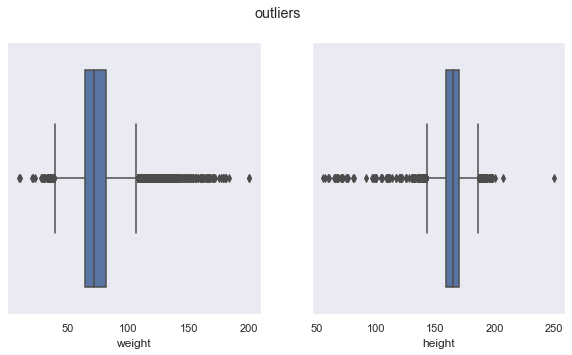

In [25]:
#boxplot
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('outliers')

#boxplot of weight
sns.boxplot(data= clean_df, x='weight',ax=axes[0])

#boxplot of height
sns.boxplot(data= clean_df, x='height',ax=axes[1]);

> The weight distribution appears to be relatively uniform around the median of 72 with more outliers above the 75th percentile, whereas the height distribution is centered around 165 but has more outliers below the 25th percentile 

In [26]:
def weight_outlier_handler(df):
    '''Using IQR method for detecting and capping outliers'''
    Q1 = df['weight'].quantile(0.25)
    Q3 = df['weight'].quantile(0.75)
    
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    # Capping outlier
    new_df_cap = df.copy()
    new_df_cap['weight'] = np.where( 
        new_df_cap['weight'] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap['weight'] < lower_limit,
            lower_limit,new_df_cap['weight']
        )
    )
    
    return new_df_cap

In [27]:
def height_outlier_handler(df):
    '''Using IQR method for detecting and capping outliers'''
    Q1 = df['height'].quantile(0.25)
    Q3 = df['height'].quantile(0.75)
    
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    # Capping outlier
    new_df_cap = df.copy()
    new_df_cap['height'] = np.where( 
        new_df_cap['height'] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap['height'] < lower_limit,
            lower_limit,new_df_cap['height']
        )
    )
    
    return new_df_cap

In [28]:
clean_df1 = weight_outlier_handler(clean_df)
clean_df1 = height_outlier_handler(clean_df1)

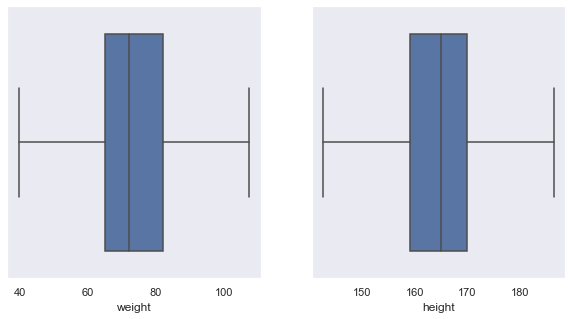

In [29]:
#### Checking if the outlier have been treated

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)


sns.boxplot(data= clean_df1, x='weight',ax=axes[0])

sns.boxplot(data= clean_df1, x='height',ax=axes[1]);

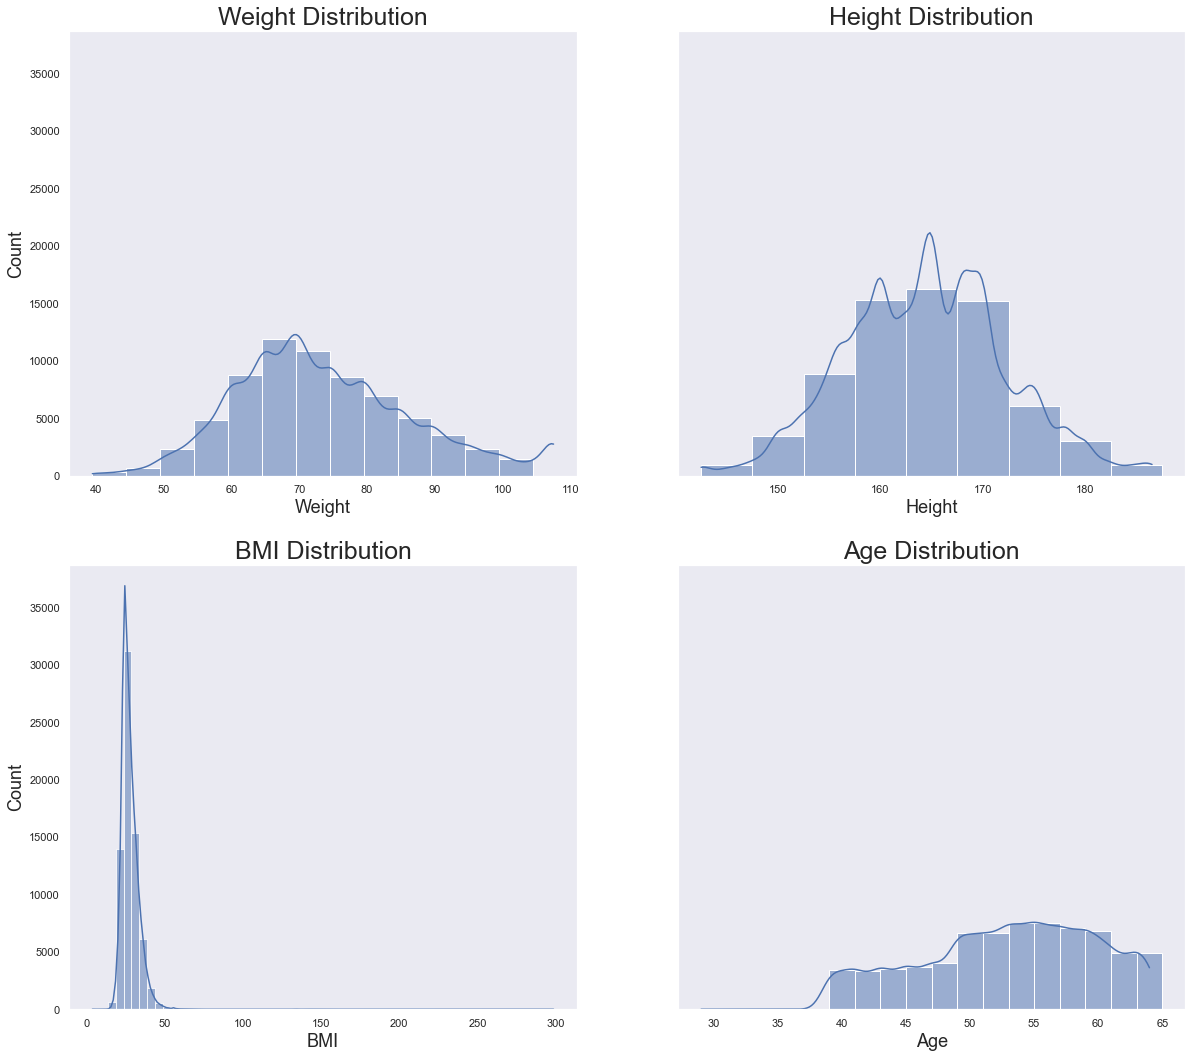

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(20,18), sharey=True)
#fig.suptitle('Distribution')



sns.histplot(data= clean_df1, x='weight',
             ax=axes[0,0],bins=np.arange(clean_df1.weight.min(),clean_df1.weight.max()+2,5),kde=True,)

sns.histplot(data= clean_df1, x='height', 
             ax=axes[0,1],bins=np.arange(clean_df1.height.min(),clean_df1.height.max()+2,5),kde=True);

sns.histplot(data= clean_df1, x='bmi', 
             ax=axes[1,0],bins=np.arange(clean_df1.bmi.min(),clean_df1.bmi.max()+2,5),kde=True);

sns.histplot(data= clean_df1, x='age', 
             ax=axes[1,1],bins=np.arange(clean_df1.age.min(),clean_df1.age.max()+2,2),kde=True);

axes[0,0].set_title('Weight Distribution',fontsize=25)
axes[0,0].set_xlabel('Weight',fontsize = 18)
axes[0,0].set_ylabel('Count',fontsize=18)
axes[0,1].set_title('Height Distribution',fontsize=25)
axes[0,1].set_xlabel('Height',fontsize = 18)
axes[1,0].set_title('BMI Distribution',fontsize=25)
axes[1,0].set_xlabel('BMI',fontsize = 18)
axes[1,0].set_ylabel('Count',fontsize=18)
axes[1,1].set_title('Age Distribution',fontsize=25)
axes[1,1].set_xlabel('Age',fontsize = 18);

### Let check the gender distribution

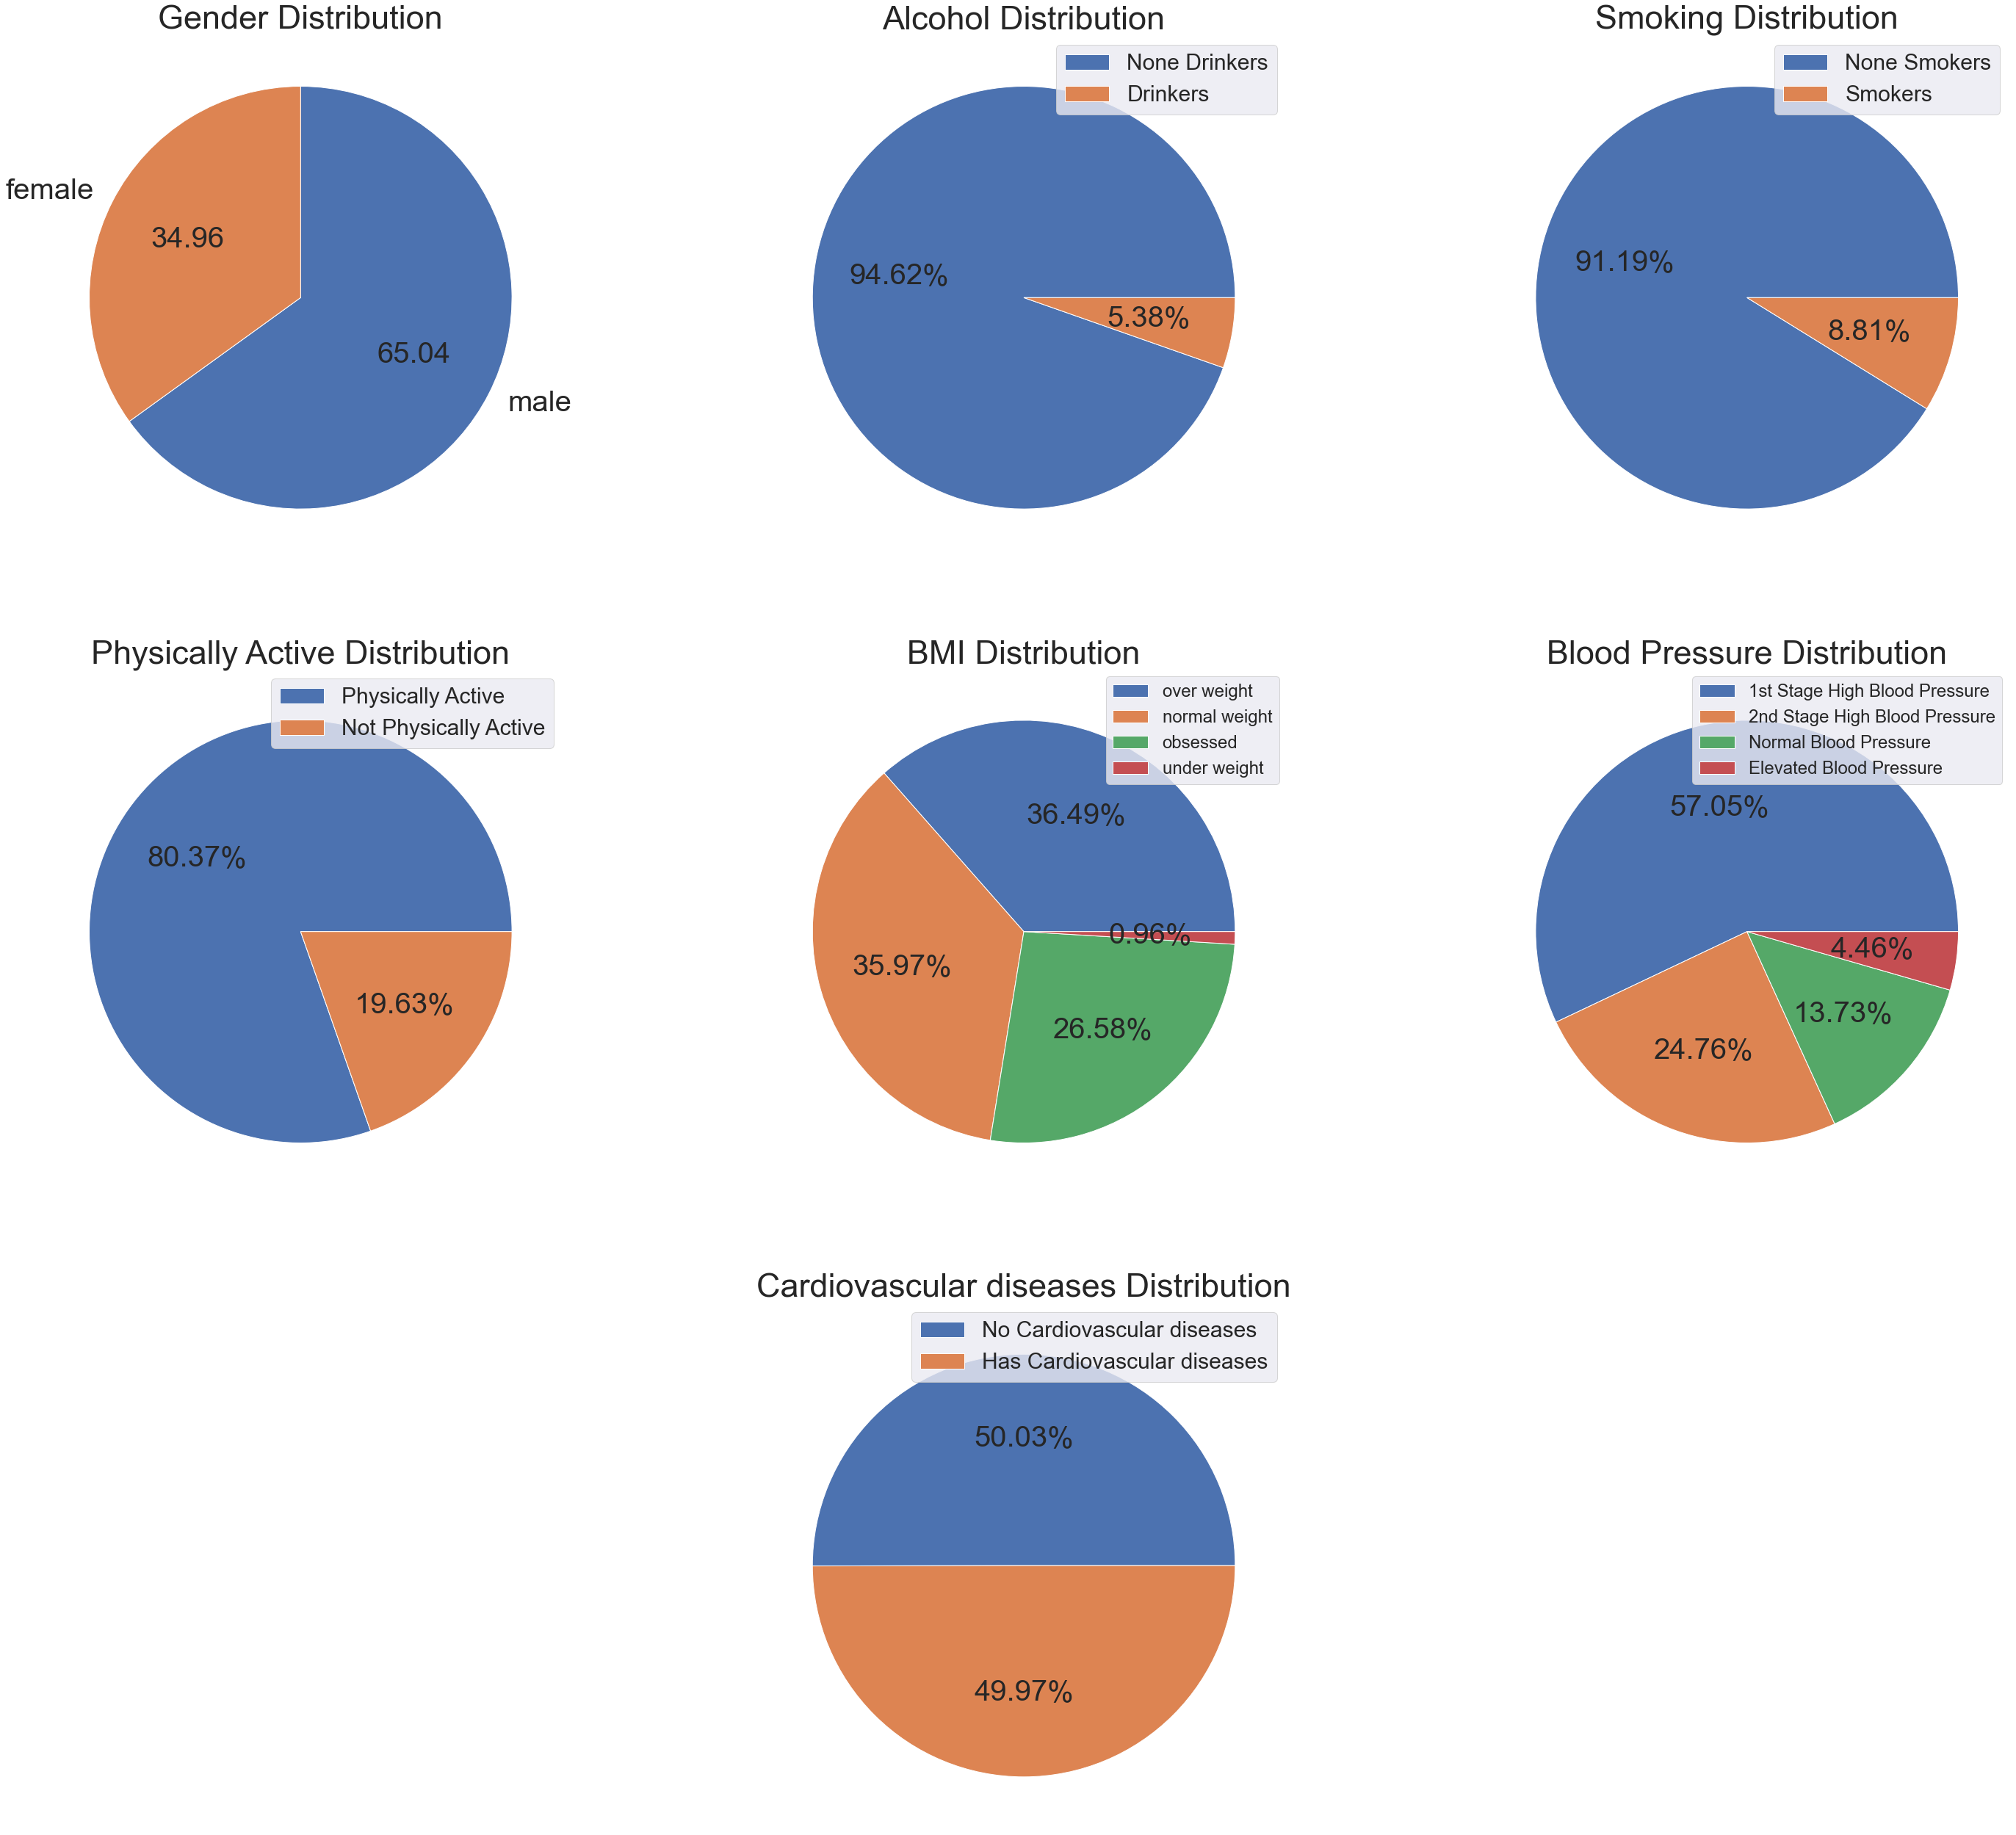

In [31]:
# Gender Distribution
gender_dist = clean_df1['gender'].value_counts()

# Smoking Distribution
smoke_dist = clean_df1['smoke'].value_counts()

# Alcohol Distribution
alcohol_dist = clean_df1['alcohol'].value_counts()

# Physical Distribution
physical_dist = clean_df1['active'].value_counts()

# Cardio Distribution
cardio_dist = clean_df1['cardio'].value_counts()

# Blood Pressure Distribution
blood_pressure_dist = clean_df1['blood_pressure_category'].value_counts()

# BMI Distribution
bmi_dist = clean_df1['bmi_category'].value_counts()




#Gender plot
axes = plt.subplot2grid((3,3),(0,0))
plt.pie(gender_dist, startangle = 90, labels=gender_dist.index, autopct='%.2f', counterclock = False, textprops={'fontsize': 40});
plt.figsize = (40,15)
plt.title('Gender Distribution', fontsize=45);


#Alcohol plot
axes = plt.subplot2grid((3,3),(0,1))
alcohol_chart = alcohol_dist[alcohol_dist.index].plot(kind='pie',autopct='%1.2f%%',ylabel='',fontsize=40, labeldistance=None,figsize = (40,15)  )
X = ['None Drinkers', 'Drinkers']
alcohol_chart.legend(loc='upper right')
plt.title('Alcohol Distribution',fontsize=45)
alcohol_chart.legend(X,fontsize=30);

# Smoking Plot
axes = plt.subplot2grid((3,3),(0,2))
smoke_chart = smoke_dist[smoke_dist.index].plot(kind='pie',autopct='%1.2f%%',ylabel='',fontsize=40, labeldistance=None,  figsize = (40,15))
X = ['None Smokers', 'Smokers']
smoke_chart.legend(loc='upper right')
plt.title('Smoking Distribution',fontsize=45)
smoke_chart.legend(X,fontsize=30);


#physical Plot
axes = plt.subplot2grid((3,3),(1,0))
physical_chart = physical_dist[physical_dist.index].plot(kind='pie',autopct='%1.2f%%',ylabel='',fontsize=40, labeldistance=None,  figsize = (40,15))
X = ['Physically Active', 'Not Physically Active']
physical_chart.legend(loc='upper right')
plt.title('Physically Active Distribution',fontsize=45)
physical_chart.legend(X,fontsize=30);



#bmi Plot
axes = plt.subplot2grid((3,3),(1,1))
bmi_chart = bmi_dist[bmi_dist.index].plot(kind='pie',autopct='%1.2f%%',ylabel='',fontsize=40, labeldistance=None,  figsize = (50,45))
X = ['over weight', 'normal weight','obsessed','under weight']
bmi_chart.legend(loc='upper right')
plt.title('BMI Distribution',fontsize=45)
bmi_chart.legend(X,fontsize=24);


#Blood Pressure Plot
axes = plt.subplot2grid((3,3),(1,2))
blood_pressure_chart = blood_pressure_dist[blood_pressure_dist.index].plot(kind='pie',autopct='%1.2f%%',ylabel='',fontsize=40, labeldistance=None,figsize = (50,45))
X = ['1st Stage High Blood Pressure', '2nd Stage High Blood Pressure','Normal Blood Pressure','Elevated Blood Pressure']
blood_pressure_chart.legend(loc='upper right')
plt.title('Blood Pressure Distribution',fontsize=45)
blood_pressure_chart.legend(X,fontsize=24);


# Cardiovascular Plot
axes = plt.subplot2grid((3,3),(2,1))
cardio_chart = cardio_dist[cardio_dist.index].plot(kind='pie',autopct='%1.2f%%',ylabel='',fontsize=40, labeldistance=None,  figsize = (50,45))
X = ['No Cardiovascular diseases', 'Has Cardiovascular diseases']
cardio_chart.legend(loc='upper right')
plt.title('Cardiovascular diseases Distribution',fontsize=45)
cardio_chart.legend(X,fontsize=30);

### Gender distribution

The gender distribution of the dataset is as follows:

Male: 45530 which makes 65.04 percent of the dataset

Female: 24470 which makes 34.96 percent of the dataset

### Let check the smoking distribution

The Smoking distribution of the dataset is as follows:

None Smokers: 63831 which makes up of  91.19 percent of the dataset

Smokers: 6169 which makes 8.81 percent of the dataset

### Alcohol distribution

The Alcohol distribution of the dataset is as follows:

None Drinkers: 66236 which makes up of  94.62 percent of the dataset

Drinkers: 3764 which makes 5.38 percent of the dataset

### Physically Active distribution

The Physically Active distribution of the dataset is as follows:

Not Physically Active: 13739 which makes up of  19.63 percent of the dataset

Physically Active: 56261 which makes 80.37 percent of the dataset

### Cardiovascular diseases distribution

From the dataset 34979 patient has cardiovascular diseases which make up of 49.97% of the dataset while 35021 of the patient didnt have any cardiovascular diseases and that is 50.03 % of the dataset

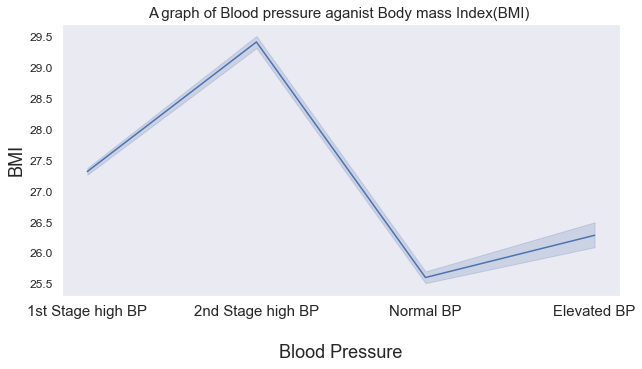

In [32]:
# Plotting Blood Pressure aganist Body mass
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_df1['blood_pressure_category'], y=clean_df1['bmi'])
plt.title("A graph of Blood pressure aganist Body mass Index(BMI) ", fontsize=15)
plt.xlabel('\nBlood Pressure',fontsize = 18);
plt.ylabel('BMI', fontsize = 18)
plt.yticks(fontsize=12)
plt.xticks([0,1,2,3],['1st Stage high BP','2nd Stage high BP','Normal BP','Elevated BP'],fontsize=15);
plt.show()

> The graph shows that people with higher body mass index tend to be at risk of high blood pressure

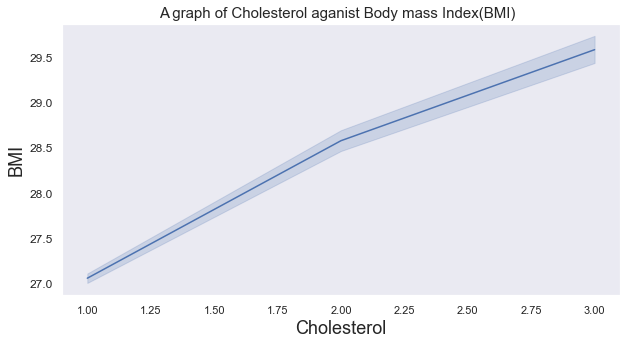

In [33]:
# Plotting Cholesterol aganist Body Mass Index
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_df1['cholesterol'], y=clean_df1['bmi'])
plt.title("A graph of Cholesterol aganist Body mass Index(BMI)  ", fontsize=15)
plt.xlabel('Cholesterol',fontsize = 18);
plt.ylabel('BMI', fontsize = 18)
plt.yticks(fontsize=12)
plt.show()

> People with higher cholesterol have higher BMI

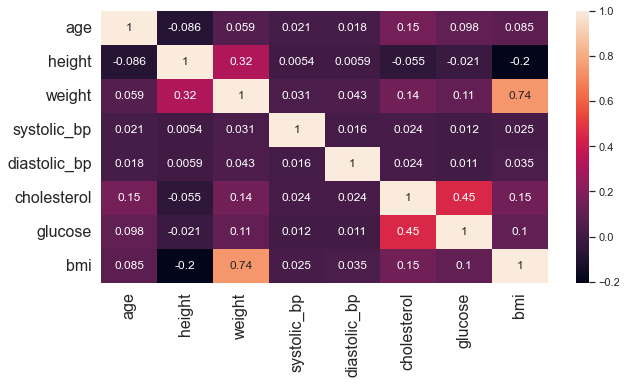

In [34]:
# Heat Map
plt.figure(figsize=(10,5))
sns.heatmap(data=clean_df1.corr(),annot=True)
plt.xticks(fontsize = 16)
plt.yticks(fontsize=16);

> A strong correlation between weight and bmi with 74% intensity, a moderate positive relationship between glucose and cholesterol with a 45 % intensity

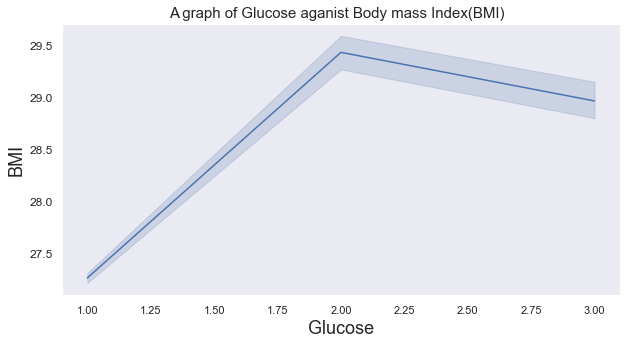

In [35]:
# Plotting Glucose aganist Body Mass Index
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_df1['glucose'], y=clean_df1['bmi'])
plt.title("A graph of Glucose aganist Body mass Index(BMI)  ", fontsize=15)
plt.xlabel('Glucose',fontsize = 18);
plt.ylabel('BMI', fontsize = 18)
plt.yticks(fontsize=12);


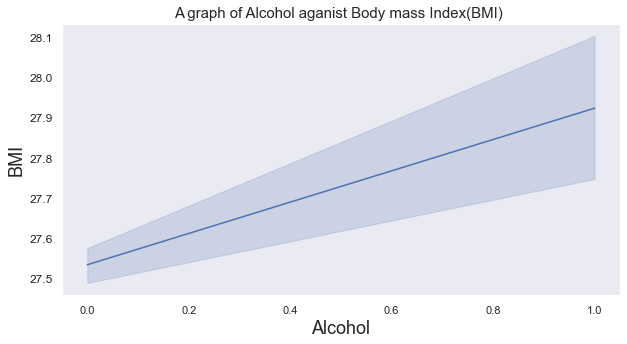

In [36]:
# Plotting Alcohol aganist Body Mass Index
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_df1['alcohol'], y=clean_df1['bmi'])
plt.title("A graph of Alcohol aganist Body mass Index(BMI) ", fontsize=15)
plt.xlabel('Alcohol',fontsize = 18);
plt.ylabel('BMI', fontsize = 18)
plt.yticks(fontsize=12);


> Patient who consumes alcohol tend to have increased BMI as depicted in the graph above.

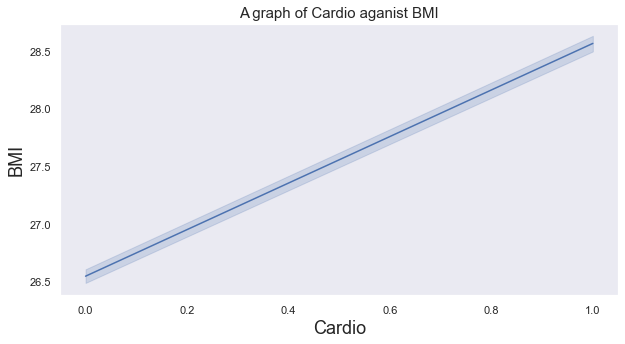

In [37]:
# Plotting Cardio aganist Body Mass Index
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_df1['cardio'], y=clean_df1['bmi'])
plt.title("A graph of Cardio aganist BMI", fontsize=15)
plt.xlabel('Cardio',fontsize = 18);
plt.ylabel('BMI', fontsize = 18)
plt.show()

> People with higher BMI tend to be at risk of cardiovascular diseases as shown in the graph above.

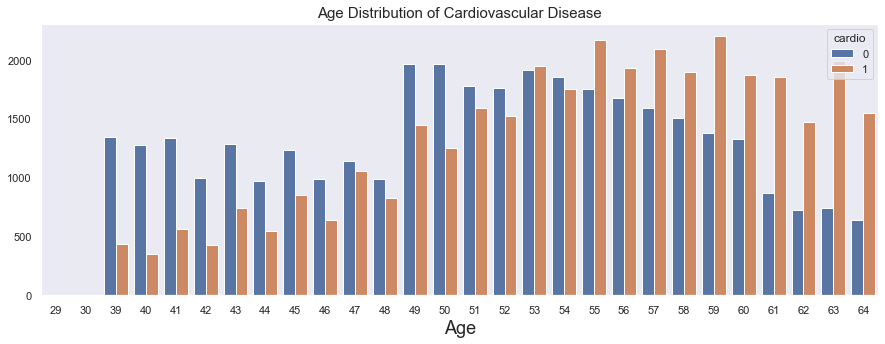

In [38]:
# Plotting Age Distribution of Cardiovascular Disease
plt.figure(figsize=(15,5))
sns.countplot(x=clean_df1['age'],hue='cardio', data=clean_df1)
plt.title("Age Distribution of Cardiovascular Disease", fontsize=15)
plt.xlabel('Age',fontsize = 18);
plt.ylabel('', fontsize = 18)
plt.show()

> From the graph above we can see that people above the age of 53 are prone to cardiovascular disease and the risk percent increase with age.

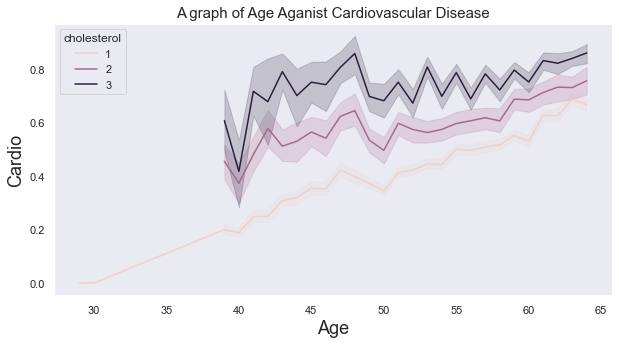

In [39]:
# Plotting Age aganist Cardio
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_df1['age'],y=df['cardio'],hue='cholesterol', data=clean_df1)
plt.title("A graph of Age Aganist Cardiovascular Disease", fontsize=15)
plt.xlabel('Age',fontsize = 18);
plt.ylabel('Cardio', fontsize = 18)
plt.show()

> Cardiovascular diseases are increasing with age as well as with cholesterol but people with a cholesterol level of 3 are at more risk of cardiovascular disease as shown in the graph above

<a id='conclusions'></a>
## Conclusions


> In conclusion, the analysis of the dataset revealed some interesting insights. The majority of the patients in the dataset were males(65.04%), and non-smokers(91.19%), non-drinkers(94.62%), and physically active(80.37%). However, a significant percentage of patients were found to have cardiovascular diseases. The analysis showed that high body mass index, alcohol consumption, and age were associated with an increased risk of cardiovascular diseases.

> It is important to note that the data only provides a snapshot of a particular population and cannot be generalized to the entire population. Further research is needed to identify other factors that could contribute to cardiovascular diseases. Nonetheless, these findings can be useful for healthcare professionals in their efforts to prevent and treat cardiovascular diseases. By addressing modifiable risk factors such as smoking, alcohol consumption, and physical inactivity, healthcare providers can help reduce the burden of cardiovascular diseases in the population.